In [1]:
!gdown "https://drive.google.com/u/0/uc?id=18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ&confirm=t"
import shutil
shutil.unpack_archive("/content/bank-data.zip", "/content/bank-data")

Downloading...
From: https://drive.google.com/u/0/uc?id=18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ&confirm=t
To: /content/bank-data.zip
100% 516k/516k [00:00<00:00, 133MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
def Readcsv(location):
    # data = pd.read_csv(location, sep = ';', nrows=10000)
    data = pd.read_csv(location, sep = ';')
    X = data.drop("y", axis=1)
    y = data["y"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    traindf = pd.concat([X_train, y_train], axis=1)
    testdf = pd.concat([X_test, y_test], axis=1)
    return traindf, testdf
traindf, testdf = Readcsv('/content/bank-data/bank-data/bank-full.csv')

In [4]:
traindf.columns, testdf.columns

(Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

In [5]:
traindf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,may,72,1,-1,0,unknown,no
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,jul,269,2,-1,0,unknown,no
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,jul,130,4,-1,0,unknown,no
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,jun,375,11,-1,0,unknown,no
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,apr,264,2,-1,0,unknown,yes


In [6]:
testdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no


In [7]:
for col in testdf.columns:
    print(f'f,ax = plt.subplots(1,2,figsize=[20,7])')
    print(f'sns.countplot(y="{col}", data=traindf, ax=ax[0])')
    print(f'sns.countplot(y="{col}", data=testdf, ax=ax[1])')
    print('')

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="age", data=traindf, ax=ax[0])
sns.countplot(y="age", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="job", data=traindf, ax=ax[0])
sns.countplot(y="job", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="marital", data=traindf, ax=ax[0])
sns.countplot(y="marital", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="education", data=traindf, ax=ax[0])
sns.countplot(y="education", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="default", data=traindf, ax=ax[0])
sns.countplot(y="default", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="balance", data=traindf, ax=ax[0])
sns.countplot(y="balance", data=testdf, ax=ax[1])

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="housing", data=traindf, ax=ax[0])
sns.countplot(y="housing", data=testdf, ax=ax[1])

f,ax = plt.subplot

<AxesSubplot:xlabel='count', ylabel='age'>

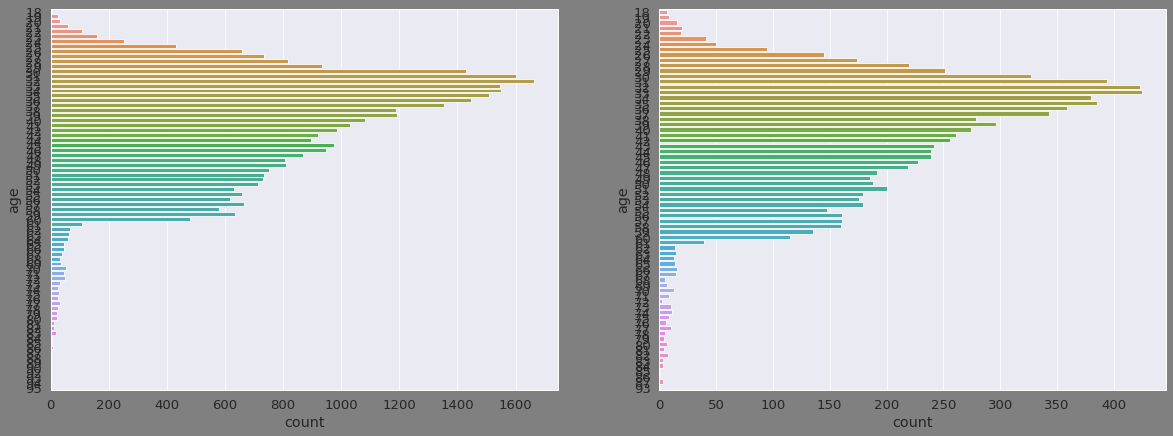

In [8]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="age", data=traindf, ax=ax[0])
sns.countplot(y="age", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='job'>

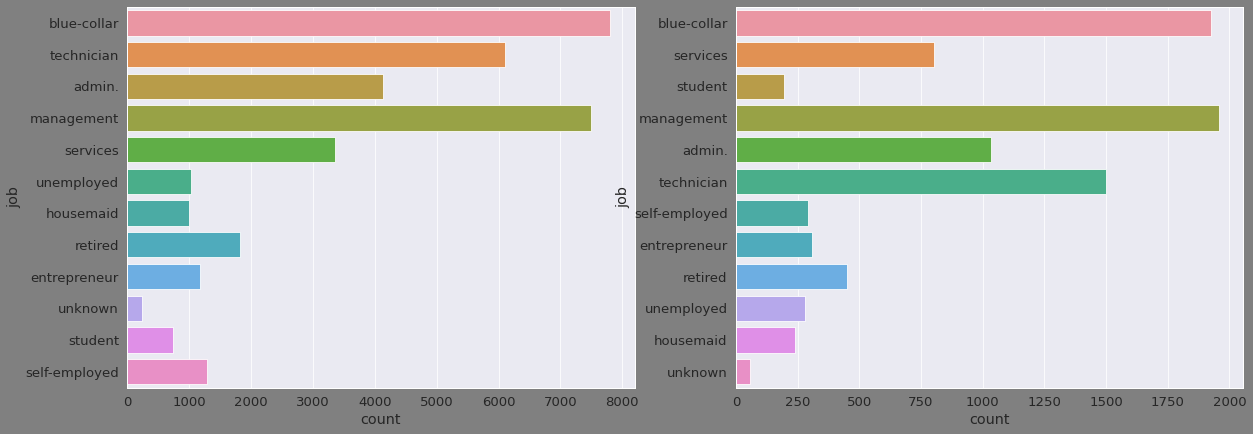

In [9]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="job", data=traindf, ax=ax[0])
sns.countplot(y="job", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='marital'>

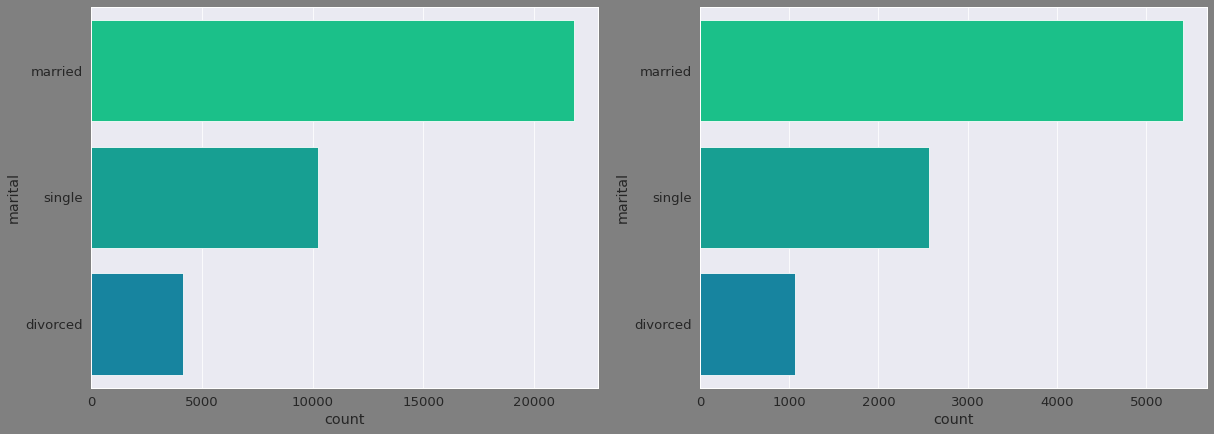

In [10]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="marital", data=traindf, ax=ax[0])
sns.countplot(y="marital", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='education'>

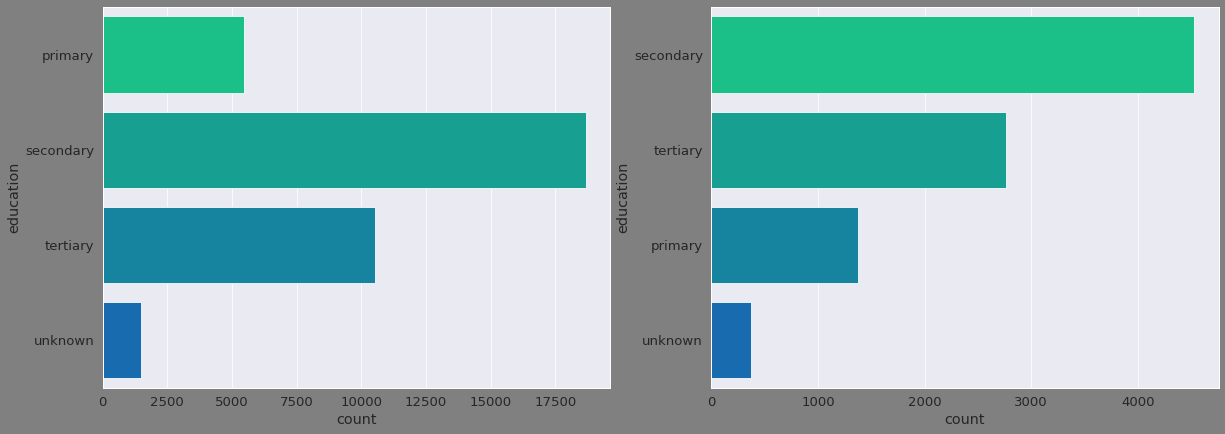

In [11]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="education", data=traindf, ax=ax[0])
sns.countplot(y="education", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='default'>

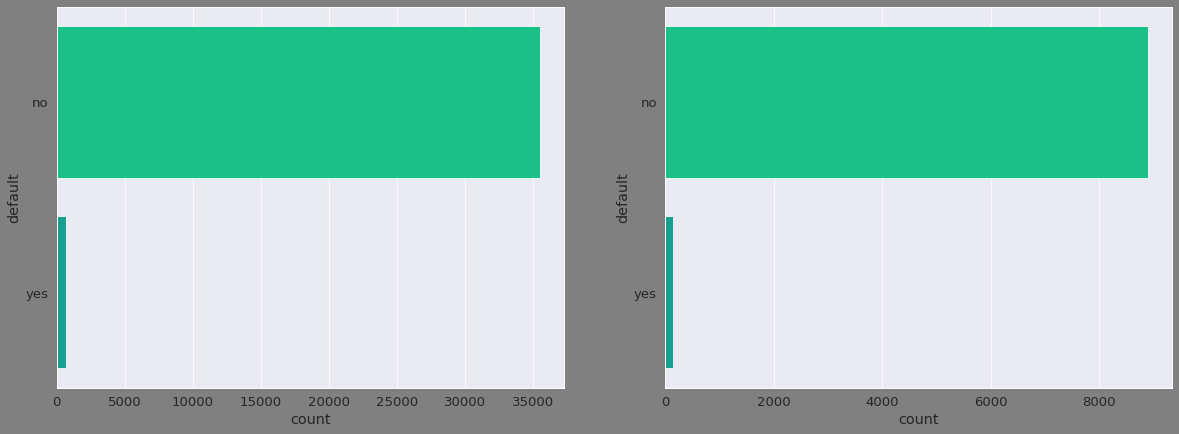

In [12]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="default", data=traindf, ax=ax[0])
sns.countplot(y="default", data=testdf, ax=ax[1])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='balance', ylabel='Density'>

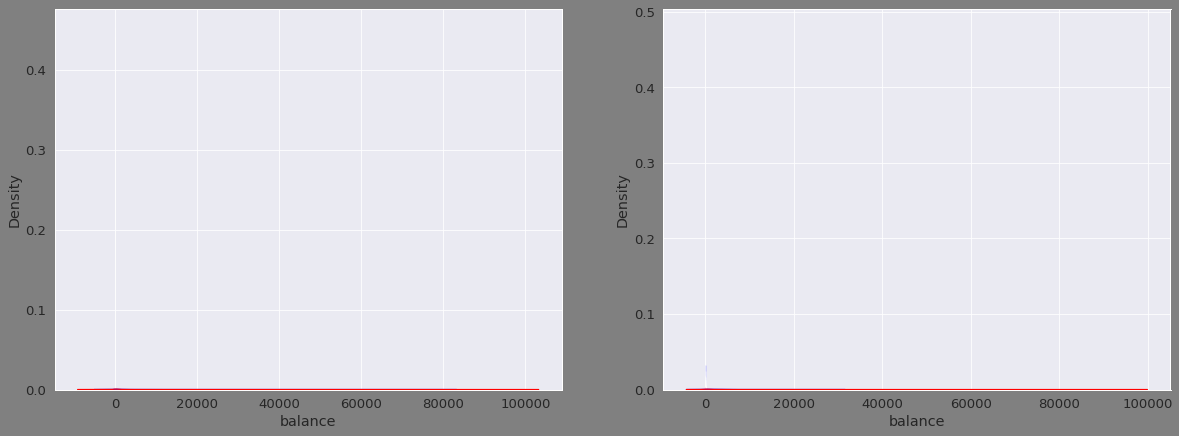

In [13]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.distplot(traindf[traindf['y']=='yes']['balance'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[0])
sns.distplot(traindf[traindf['y']=='no']['balance'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[0])
sns.distplot(testdf[testdf['y']=='yes']['balance'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[1])
sns.distplot(testdf[testdf['y']=='no']['balance'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='housing'>

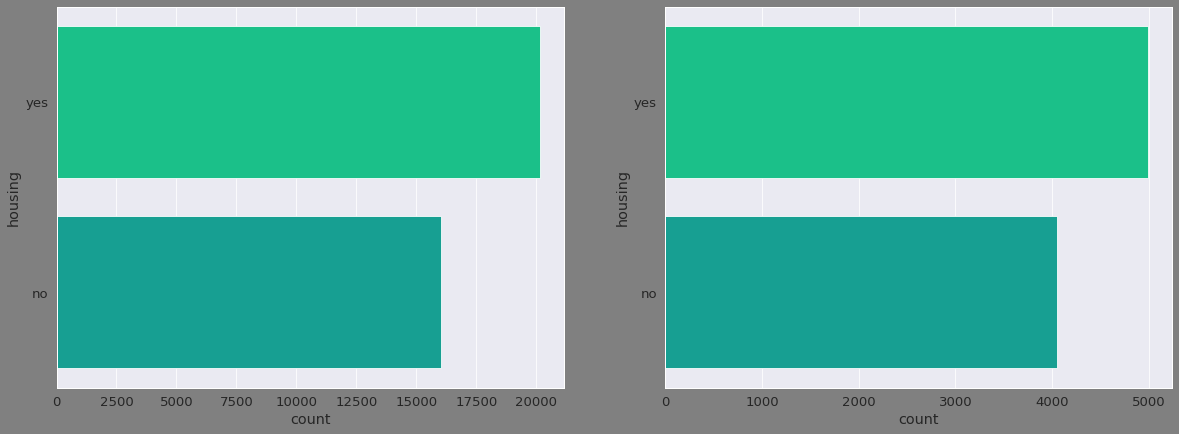

In [14]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="housing", data=traindf, ax=ax[0])
sns.countplot(y="housing", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='loan'>

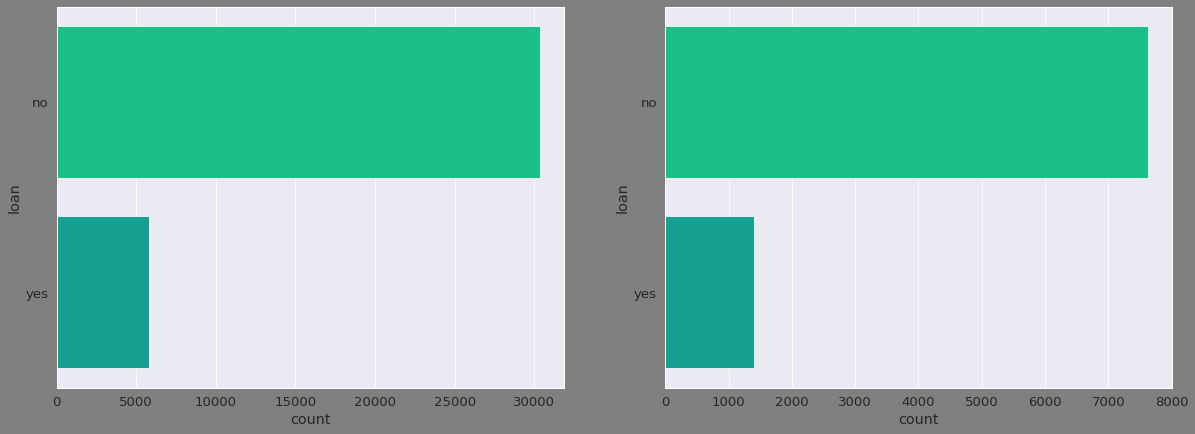

In [15]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="loan", data=traindf, ax=ax[0])
sns.countplot(y="loan", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='contact'>

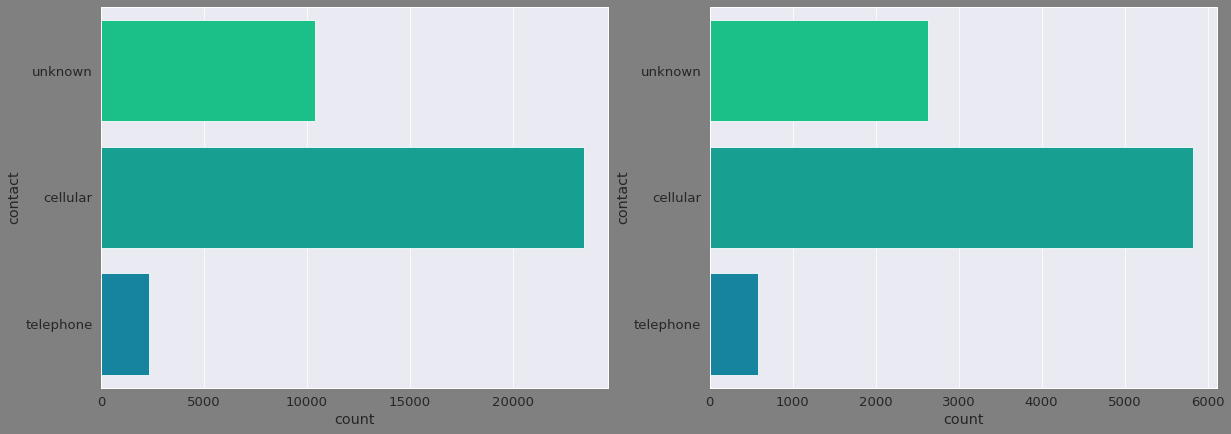

In [16]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="contact", data=traindf, ax=ax[0])
sns.countplot(y="contact", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='day'>

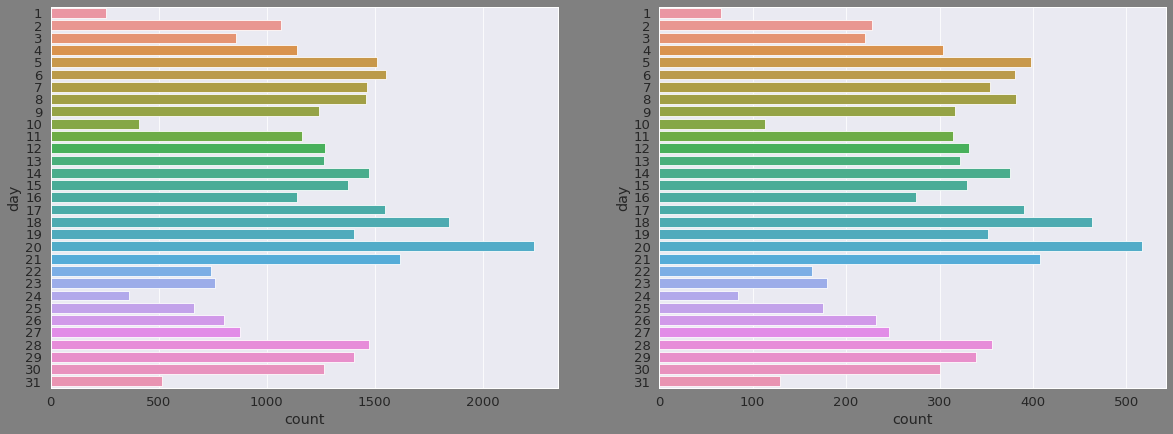

In [17]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="day", data=traindf, ax=ax[0])
sns.countplot(y="day", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='month'>

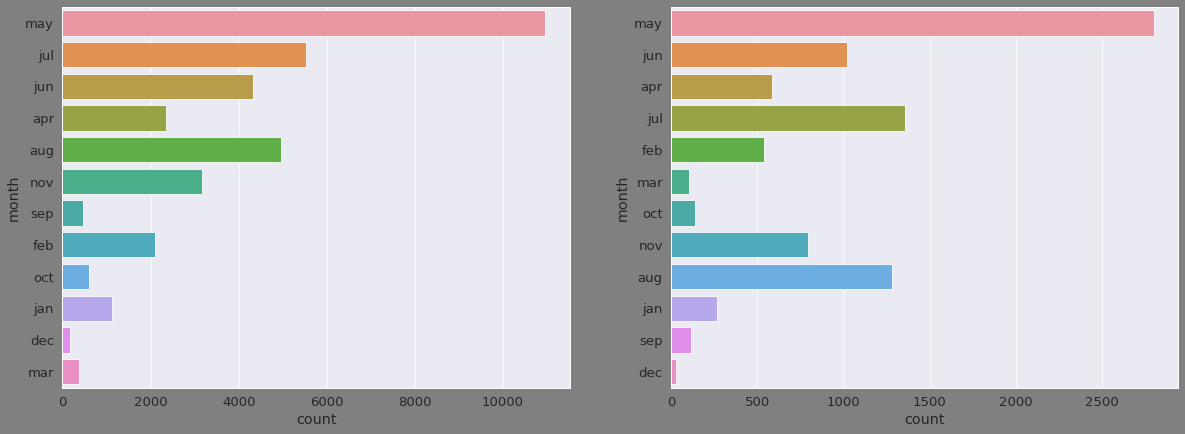

In [18]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="month", data=traindf, ax=ax[0])
sns.countplot(y="month", data=testdf, ax=ax[1])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='duration', ylabel='Density'>

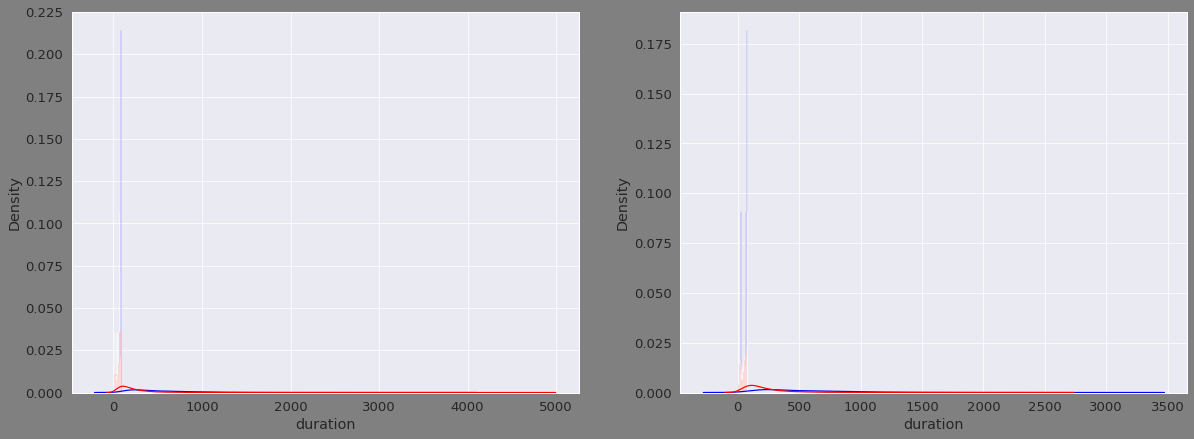

In [19]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.distplot(traindf[traindf['y']=='yes']['duration'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[0])
sns.distplot(traindf[traindf['y']=='no']['duration'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[0])
sns.distplot(testdf[testdf['y']=='yes']['duration'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[1])
sns.distplot(testdf[testdf['y']=='no']['duration'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='campaign'>

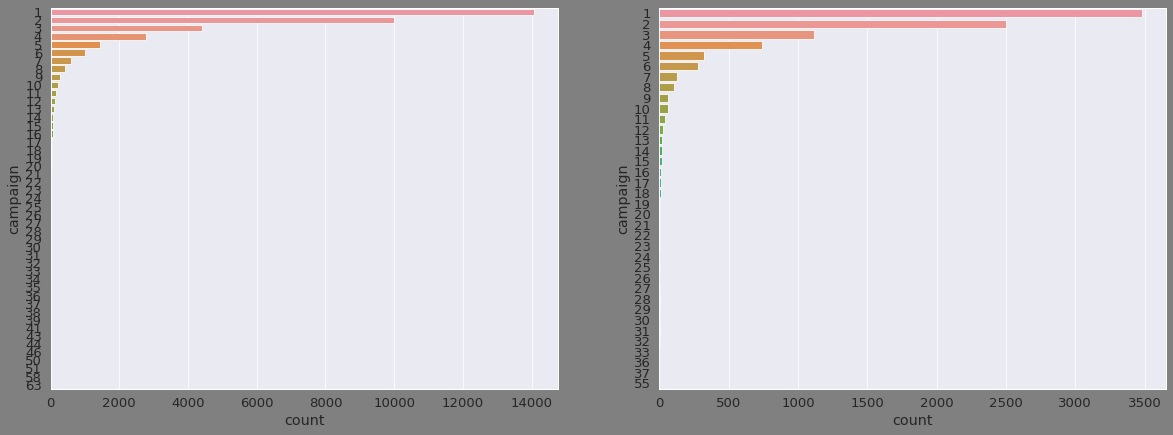

In [20]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="campaign", data=traindf, ax=ax[0])
sns.countplot(y="campaign", data=testdf, ax=ax[1])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='pdays', ylabel='Density'>

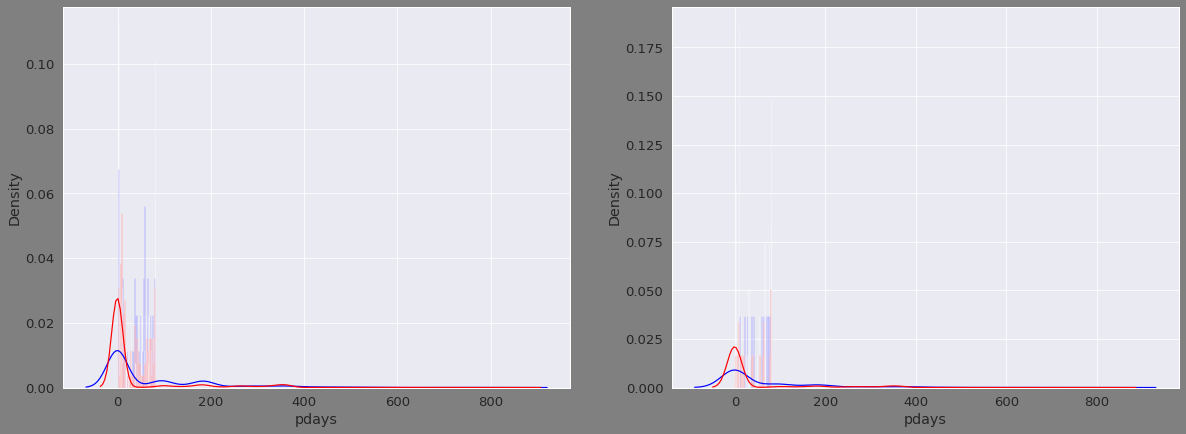

In [21]:

f,ax = plt.subplots(1,2,figsize=[20,7])
sns.distplot(traindf[traindf['y']=='yes']['pdays'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[0])
sns.distplot(traindf[traindf['y']=='no']['pdays'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[0])
sns.distplot(testdf[testdf['y']=='yes']['pdays'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',ax=ax[1])
sns.distplot(testdf[testdf['y']=='no']['pdays'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='previous'>

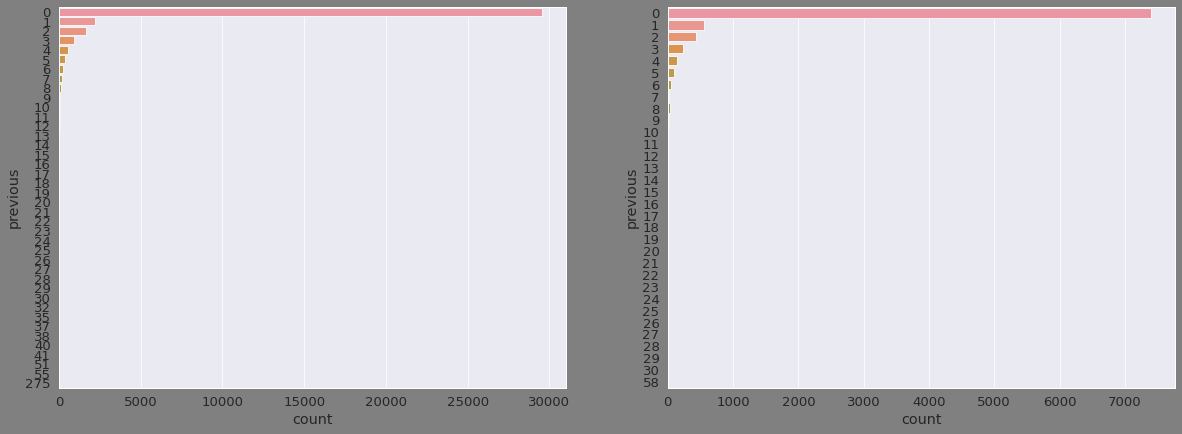

In [22]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="previous", data=traindf, ax=ax[0])
sns.countplot(y="previous", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='poutcome'>

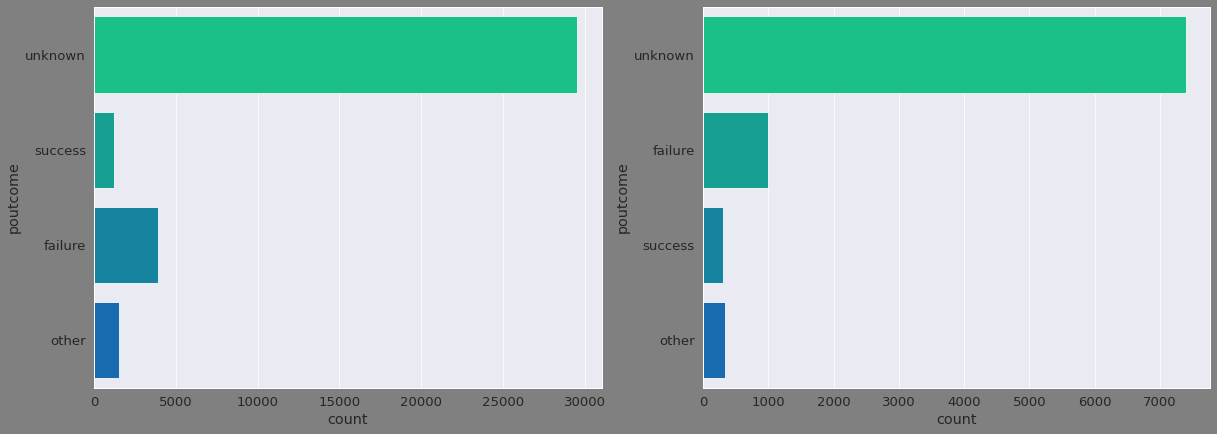

In [23]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="poutcome", data=traindf, ax=ax[0])
sns.countplot(y="poutcome", data=testdf, ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='y'>

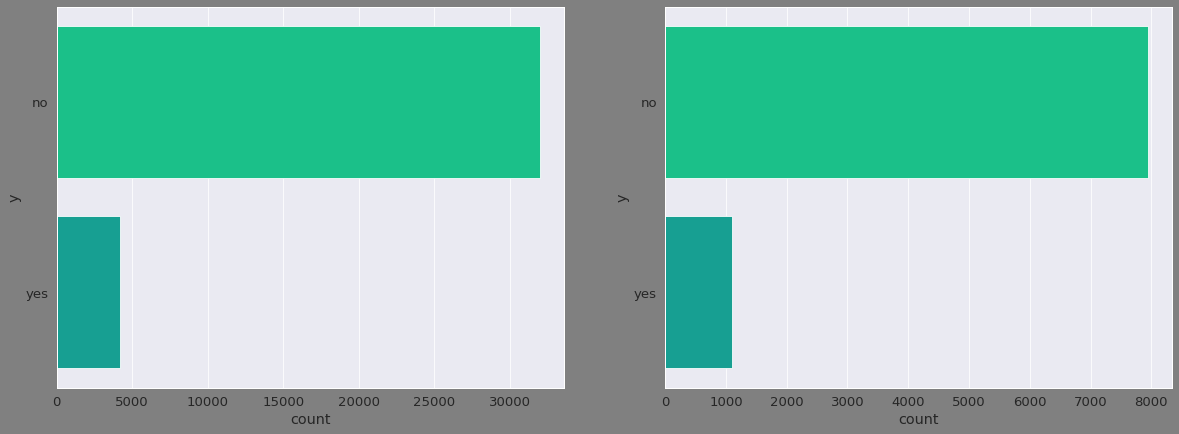

In [24]:
f,ax = plt.subplots(1,2,figsize=[20,7])
sns.countplot(y="y", data=traindf, ax=ax[0])
sns.countplot(y="y", data=testdf, ax=ax[1])

In [25]:
#drop default
traindf = traindf.drop('default', axis=1)
testdf = testdf.drop('default', axis=1)

In [26]:
#drop Contact
traindf = traindf.drop('contact', axis=1)
testdf = testdf.drop('contact', axis=1)

In [27]:
#drop poutcome
traindf = traindf.drop('poutcome', axis=1)
testdf = testdf.drop('poutcome', axis=1)

In [28]:
#function for concatation so that we won't have to repeat them again and again in future.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf
#Function for separation so that we won't have to repeat them again.
def saperate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [29]:
def filling(data1,data2):
    data = combine(data1,data2)
    # data.columns = data.columns.str.replace(' ', '')
    # print(data.columns)
    median_pdays = data.loc[data["pdays"] != -1, "pdays"].median()
    data.loc[data["pdays"] == -1, "pdays"] = median_pdays
    # Convert categorical variables to numerical labels
    cat_vars = ['job', 'marital', 'education', 'housing', 'loan', 'month', 'y']
    le = LabelEncoder()
    for var in cat_vars:
        data[var] = le.fit_transform(data[var])
    # Scale the numerical features
    scaler = StandardScaler()
    num_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    data[num_vars] = scaler.fit_transform(data[num_vars])

    traindf, testdf    = saperate(data)
    return traindf, testdf
# filling(traindf, testdf)
traindf, testdf = filling(traindf, testdf)
#testdf = filling(testdf)

In [30]:
testdf.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
3776,-0.088167,1,1,1,-0.256926,1,0,0.023260,8,-0.256919,-0.569351,-0.110178,-0.251940,0
9928,0.571051,7,2,1,0.749402,0,0,-0.817845,6,-0.680179,-0.246560,-0.110178,-0.251940,0
33409,-1.500776,8,2,2,-0.270721,1,0,0.503892,0,-0.124893,-0.569351,-0.110178,-0.251940,0
31885,0.100181,4,1,2,0.134898,0,0,-0.817845,0,0.205172,-0.569351,2.691386,0.182198,0
15738,1.418617,4,1,2,-0.376149,0,1,0.624050,5,-0.532621,-0.246560,-0.110178,-0.251940,0


In [31]:
traindf.columns, testdf.columns

(Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
       dtype='object'))

<AxesSubplot:>

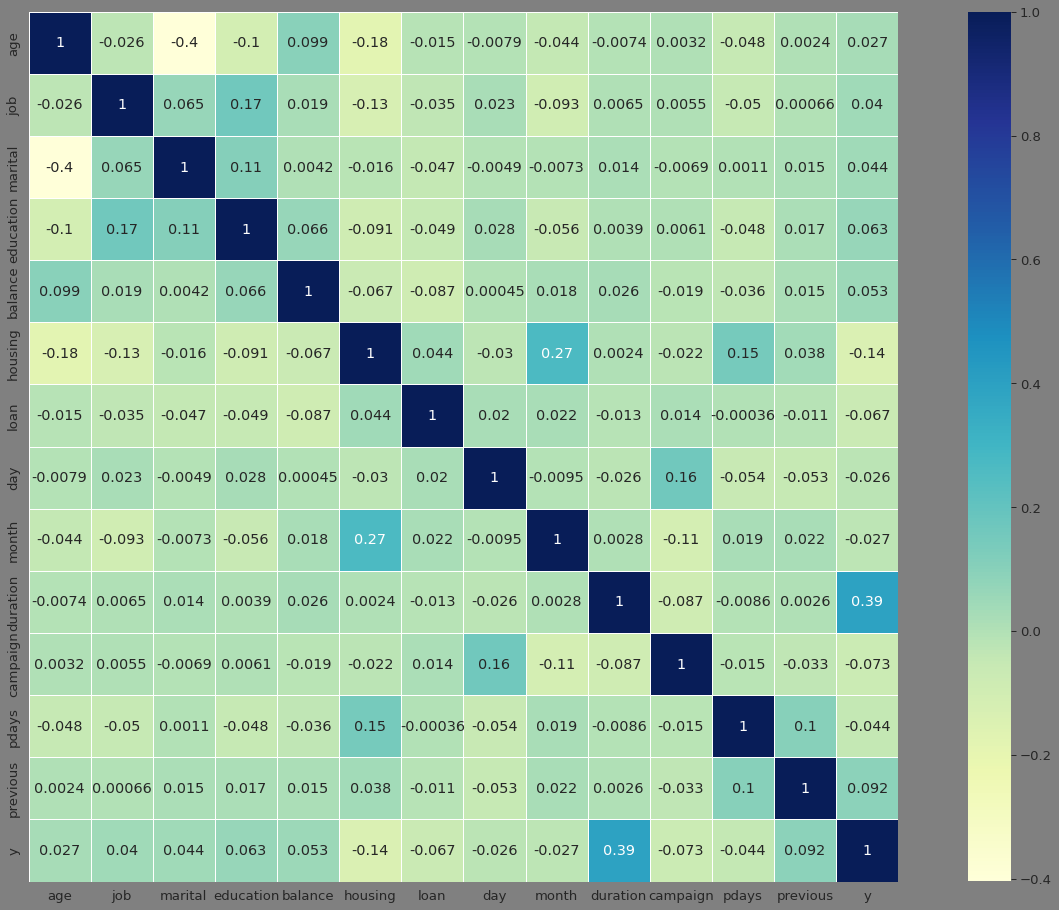

In [32]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [33]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier, plot_importance 

In [34]:
X = traindf.drop('y', axis=1)
y = traindf['y']
X_test = testdf.drop('y', axis=1)
y_test = testdf['y']
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [35]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [45]:
clf_svm = SVC()
scores = cross_val_score(clf_svm, npX, npy, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(scores)
clf_svm.fit(npX, npy)


0.8878013516555303


SVC()

In [49]:
nptest = np.array(testdf.drop('y', axis=1))
pred = clf_svm.predict(nptest)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("Accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)


Accuracy: 0.8845515868627668
precision: 0.6496815286624203
recall: 0.09349220898258478
f1: 0.16346153846153846
